# Color Optimization with Gradient Descent

This notebook demonstrates using the coloropt package for gradient-based color optimization.

In [1]:
# import sys
# sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import torch

from coloropt.gradient import optimize_points_gd, optimize_points_with_prior_gd, optimize_points_3d
from coloropt.visualization import plot_2d_point_distribution, plot_optimization_results, convert_points_to_rgb
from coloropt.core import evaluate_point_distribution

## Basic Gradient Descent Optimization

First, let's optimize a set of points without any prior constraint.

In [2]:
# Parameters for the optimization
n_points = 15
alpha = 50.0  # Sharpness parameter for loss function
lr = 0.01      # Learning rate
n_iters = 2000  # Number of iterations
num_runs = 2    # Number of runs (we'll take the best result)

In [3]:
# Optimize positions
print("Optimizing point positions with gradient descent...")
points, loss_history = optimize_points_gd(
    n_points=n_points,
    alpha=alpha,
    lr=lr,
    n_iters=n_iters,
    num_runs=num_runs
)

Optimizing point positions with gradient descent...
Run 1, Iteration 100/2000, Loss: -0.2782
Run 1, Iteration 200/2000, Loss: -0.2789
Run 1, Iteration 300/2000, Loss: -0.2789
Run 1, Iteration 400/2000, Loss: -0.2789
Run 1, Iteration 500/2000, Loss: -0.2789
Run 1, Iteration 600/2000, Loss: -0.2789
Run 1, Iteration 700/2000, Loss: -0.2789
Run 1, Iteration 800/2000, Loss: -0.2789
Run 1, Iteration 900/2000, Loss: -0.2789
Run 1, Iteration 1000/2000, Loss: -0.2789
Run 1, Iteration 1100/2000, Loss: -0.2789
Run 1, Iteration 1200/2000, Loss: -0.2789
Run 1, Iteration 1300/2000, Loss: -0.2789
Run 1, Iteration 1400/2000, Loss: -0.2789
Run 1, Iteration 1500/2000, Loss: -0.2789
Run 1, Iteration 1600/2000, Loss: -0.2789
Run 1, Iteration 1700/2000, Loss: -0.2789
Run 1, Iteration 1800/2000, Loss: -0.2789
Run 1, Iteration 1900/2000, Loss: -0.2789
Run 1, Iteration 2000/2000, Loss: -0.2789
Run 1 completed - Min distance: 0.3314
New best configuration found: 0.3314
Run 2, Iteration 100/2000, Loss: -0.2776


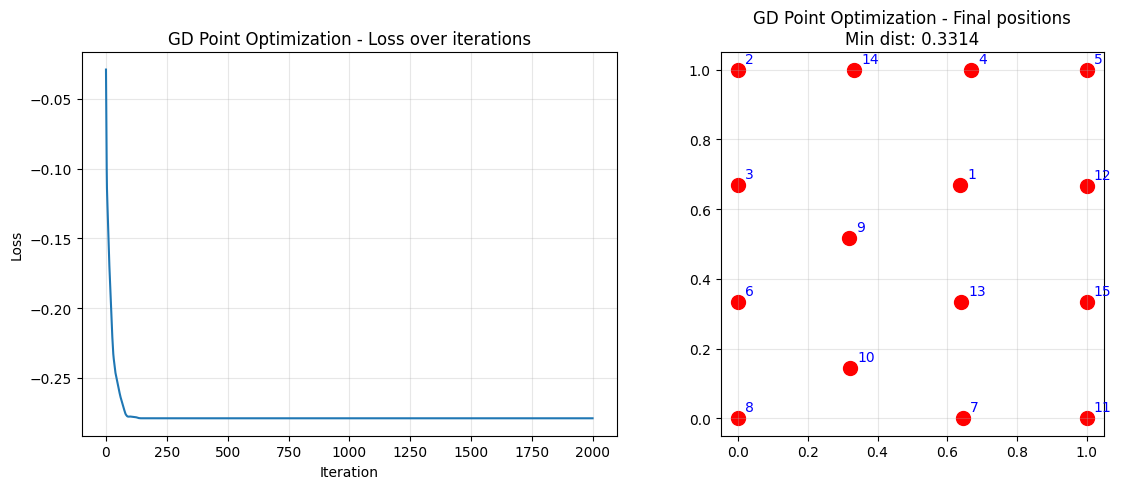

--- Evaluation for GD Optimized Points ---
Number of points: 15
Minimum distance: 0.3314
Mean distance: 0.7210
Median distance: 0.7036
Max distance: 1.4142



(np.float32(0.3314486),
 array([0.3314486 , 0.33147746, 0.33202904, 0.33330038, 0.33332625,
        0.33337337, 0.33397153, 0.33399943, 0.33410776, 0.33444363,
        0.3347781 , 0.33520874, 0.35301876, 0.3532875 , 0.3535133 ,
        0.35405993, 0.35526782, 0.3592339 , 0.3627241 , 0.3677967 ,
        0.36944327, 0.3707754 , 0.37125954, 0.37313047, 0.44826198,
        0.47051153, 0.4705265 , 0.4834917 , 0.48713896, 0.48906633,
        0.49040172, 0.49102703, 0.4948612 , 0.57919794, 0.59594595,
        0.6074002 , 0.6106954 , 0.611969  , 0.61420506, 0.63729256,
        0.64076936, 0.6447322 , 0.6658012 , 0.66589224, 0.6660285 ,
        0.66662663, 0.66669965, 0.66797096, 0.6685514 , 0.66998667,
        0.6934893 , 0.6970541 , 0.7035892 , 0.7050273 , 0.71768796,
        0.72036576, 0.7224993 , 0.72294235, 0.72615945, 0.7325818 ,
        0.74480313, 0.74480313, 0.7449493 , 0.7456832 , 0.75538486,
        0.75604117, 0.76182973, 0.8348435 , 0.85460216, 0.8546511 ,
        0.85519195, 0.91

In [4]:
# Plot results
plot_optimization_results(points, loss_history, title="GD Point Optimization")

# Evaluate the distribution
evaluate_point_distribution(points, title="GD Optimized Points")

## Gradient Descent with Prior Points

Now, let's optimize a set of points while keeping some fixed points.

In [5]:
# Define prior points
prior_points = [(0.2, 0.2), (0.8, 0.8), (0.2, 0.8), (0.8, 0.2)]
n_free = 10  # Number of free points to optimize

# Optimize positions with prior points
print("Optimizing point positions with prior constraints...")
points_with_prior, loss_history_prior, prior_indices = optimize_points_with_prior_gd(
    n_free=n_free,
    prior_coords=prior_points,
    alpha=alpha,
    lr=lr,
    n_iters=n_iters,
    num_runs=num_runs
)

Optimizing point positions with prior constraints...


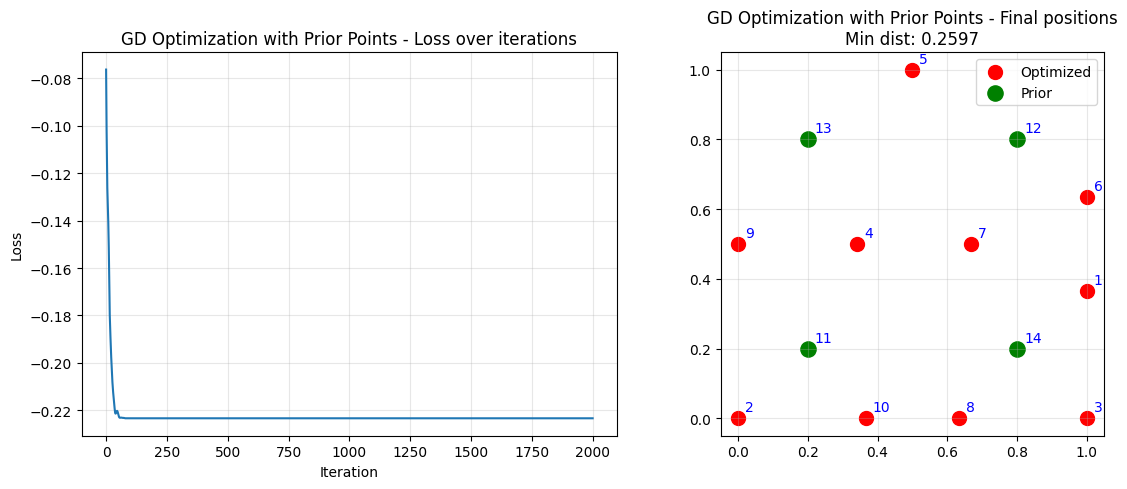

--- Evaluation for GD with Prior Points ---
Number of points: 14
Minimum distance: 0.2597
Mean distance: 0.6490
Median distance: 0.6194
Max distance: 1.1842



(np.float32(0.2596808),
 array([0.2596808 , 0.25973454, 0.25973457, 0.25978777, 0.26856655,
        0.26856735, 0.2828427 , 0.28284273, 0.32470638, 0.32823518,
        0.32824424, 0.33194986, 0.33195254, 0.34209716, 0.35920855,
        0.35926756, 0.3605423 , 0.36055505, 0.36055523, 0.360568  ,
        0.3657167 , 0.36571676, 0.36580017, 0.47804758, 0.47812337,
        0.47812343, 0.4781999 , 0.50001544, 0.50055903, 0.5010614 ,
        0.5172606 , 0.52433944, 0.5270848 , 0.547425  , 0.54742664,
        0.5548897 , 0.55489504, 0.57911503, 0.58365935, 0.6       ,
        0.6       , 0.6       , 0.6       , 0.60085344, 0.6058316 ,
        0.6194247 , 0.619487  , 0.63428324, 0.6342833 , 0.6343675 ,
        0.66680354, 0.6714508 , 0.6714837 , 0.7070959 , 0.7322056 ,
        0.7322369 , 0.8075948 , 0.8076699 , 0.8169664 , 0.8169835 ,
        0.8169835 , 0.81700045, 0.82462114, 0.82462114, 0.82462114,
        0.82462114, 0.8263399 , 0.83344585, 0.84852815, 0.84852815,
        0.854395  , 0.85

In [6]:
# Plot results with prior points
plot_optimization_results(
    points=points_with_prior, 
    loss_history=loss_history_prior, 
    title="GD Optimization with Prior Points",
    prior_indices=prior_indices
)

# Evaluate the distribution
evaluate_point_distribution(points_with_prior, title="GD with Prior Points")

## Custom Domain Optimization

We can also optimize in different domains than the default [0, 1] square.

Run 1, Iteration 100/2000, Loss: 1.3878
Run 1, Iteration 200/2000, Loss: 1.3872
Run 1, Iteration 300/2000, Loss: 1.3872
Run 1, Iteration 400/2000, Loss: 1.3872
Run 1, Iteration 500/2000, Loss: 1.3872
Run 1, Iteration 600/2000, Loss: 1.3872


Run 1, Iteration 700/2000, Loss: 1.3872
Run 1, Iteration 800/2000, Loss: 1.3872
Run 1, Iteration 900/2000, Loss: 1.3872
Run 1, Iteration 1000/2000, Loss: 1.3872
Run 1, Iteration 1100/2000, Loss: 1.3872
Run 1, Iteration 1200/2000, Loss: 1.3872
Run 1, Iteration 1300/2000, Loss: 1.3872
Run 1, Iteration 1400/2000, Loss: 1.3872
Run 1, Iteration 1500/2000, Loss: 1.3872
Run 1, Iteration 1600/2000, Loss: 1.3872
Run 1, Iteration 1700/2000, Loss: 1.3872
Run 1, Iteration 1800/2000, Loss: 1.3872
Run 1, Iteration 1900/2000, Loss: 1.3872
Run 1, Iteration 2000/2000, Loss: 1.3872
Run 1 completed - Min distance: 0.7619
New best configuration found: 0.7619
Run 2, Iteration 100/2000, Loss: 1.2674
Run 2, Iteration 200/2000, Loss: 1.2674
Run 2, Iteration 300/2000, Loss: 1.2674
Run 2, Iteration 400/2000, Loss: 1.2674
Run 2, Iteration 500/2000, Loss: 1.2674
Run 2, Iteration 600/2000, Loss: 1.2674
Run 2, Iteration 700/2000, Loss: 1.2674
Run 2, Iteration 800/2000, Loss: 1.2674
Run 2, Iteration 900/2000, Loss: 

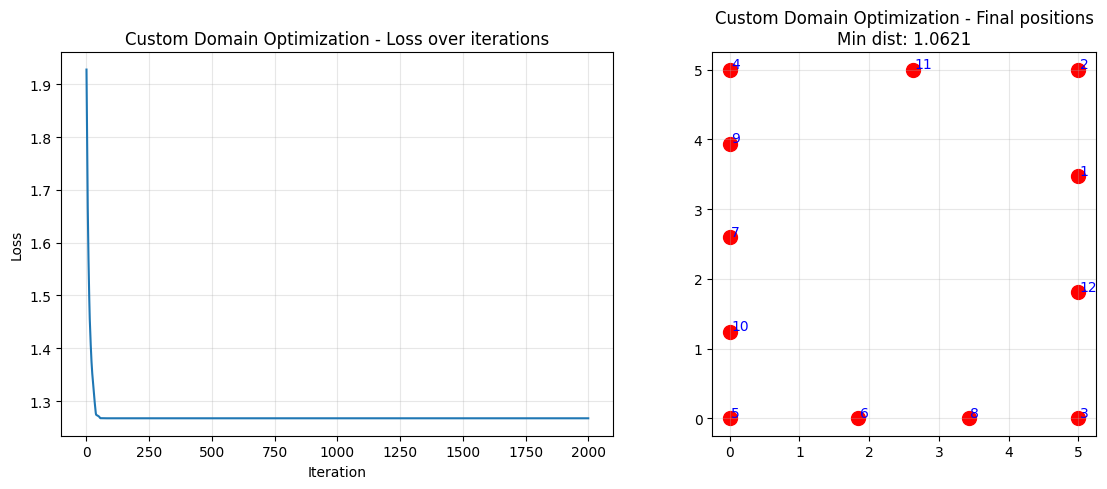

--- Evaluation for Custom Domain Optimization ---
Number of points: 12
Minimum distance: 1.0621
Mean distance: 4.0850
Median distance: 4.4661
Max distance: 7.0711



(np.float32(1.0621357),
 array([1.0621357, 1.2416242, 1.337115 , 1.359125 , 1.5289667, 1.5711281,
        1.5849419, 1.666482 , 1.8045514, 1.84393  , 2.2229955, 2.3756013,
        2.3926656, 2.3992507, 2.6007493, 2.6243987, 2.69624  , 2.8251054,
        2.8311837, 3.15607  , 3.188099 , 3.1954486, 3.4288719, 3.4710333,
        3.5558224, 3.6355445, 3.646751 , 3.7583756, 3.8100548, 3.9378643,
        3.981755 , 4.30361  , 4.3482013, 4.583978 , 4.691359 , 5.       ,
        5.       , 5.       , 5.       , 5.0217457, 5.031589 , 5.0605464,
        5.0629964, 5.0643044, 5.0751743, 5.1115685, 5.151857 , 5.221488 ,
        5.2285504, 5.2410345, 5.3156753, 5.329172 , 5.436085 , 5.47451  ,
        5.5356555, 5.5458455, 5.6359468, 5.646899 , 5.912764 , 5.9338765,
        6.0627685, 6.086713 , 6.255029 , 6.3644934, 7.071068 , 7.071068 ],
       dtype=float32))

In [7]:
# Define a custom domain as [0, 5] x [0, 5]
domain = (0, 5)

# Optimize in the custom domain
custom_points, custom_loss_history = optimize_points_gd(
    n_points=12,
    alpha=1,
    lr=0.05,
    n_iters=n_iters,
    num_runs=num_runs,
    domain=domain
)

# Plot results with custom domain
plot_optimization_results(
    points=custom_points, 
    loss_history=custom_loss_history, 
    title="Custom Domain Optimization",
    domain=domain
)

# Evaluate the distribution
evaluate_point_distribution(custom_points, title="Custom Domain Optimization")

## Visualization of Point Movement During Optimization

Let's visualize how the points move during the optimization process.

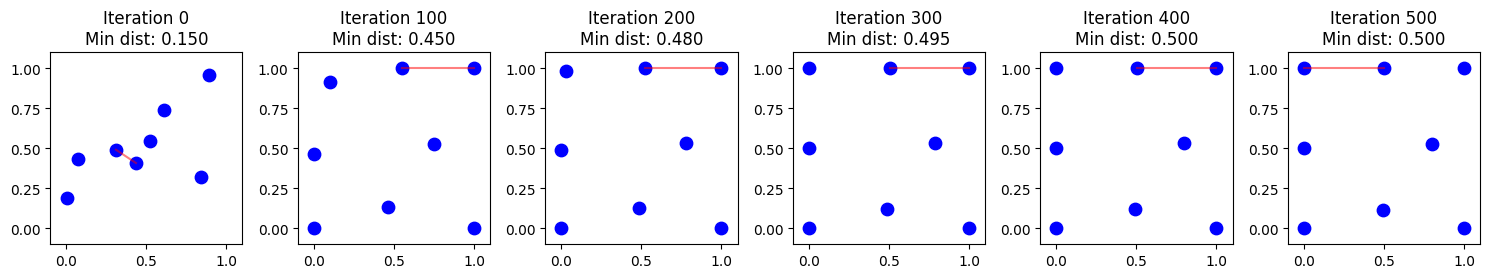

In [8]:
# Create a visualization of point movement during optimization
def visualize_optimization_process(n_points=8, n_iters=500, interval=50):
    # Initialize points randomly as a proper parameter
    points = torch.rand(n_points, 2)
    points.requires_grad = True
    optimizer = torch.optim.Adam([points], lr=0.01)
    
    # Store point positions at intervals
    point_history = [points.detach().clone().numpy()]
    
    # Run optimization and track progress
    for it in range(n_iters):
        optimizer.zero_grad()
        # Use the loss function from coloropt
        loss = torch.tensor(0.0)  # Placeholder, to be replaced with actual code
        
        # Calculate loss using coloropt's function
        from coloropt.gradient import compute_loss
        loss = compute_loss(points, alpha=50.0)
        
        loss.backward()
        optimizer.step()
        
        # Project points back to [0,1]^2
        with torch.no_grad():
            points.data.clamp_(0.0, 1.0)
        
        # Store point positions at intervals
        if (it+1) % interval == 0:
            point_history.append(points.detach().clone().numpy())
    
    # Visualize the optimization process
    plt.figure(figsize=(15, 5))
    n_snapshots = len(point_history)
    
    for i, pts in enumerate(point_history):
        plt.subplot(1, n_snapshots, i+1)
        plt.scatter(pts[:, 0], pts[:, 1], s=80, c='blue')
        
        # Draw lines connecting points to show minimum distances
        min_dist = float('inf')
        min_pair = None
        
        for j in range(len(pts)):
            for k in range(j+1, len(pts)):
                dist = np.linalg.norm(pts[j] - pts[k])
                if dist < min_dist:
                    min_dist = dist
                    min_pair = (j, k)
        
        # Draw line for minimum distance pair
        if min_pair:
            j, k = min_pair
            plt.plot([pts[j, 0], pts[k, 0]], [pts[j, 1], pts[k, 1]], 'r-', alpha=0.5)
        
        plt.title(f"Iteration {i * interval}\nMin dist: {min_dist:.3f}")
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)
        plt.gca().set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_optimization_process(n_points=8, n_iters=500, interval=100)

## From 2D Points to RGB Colors

Similar optimization can be done in the 3D RGB space.

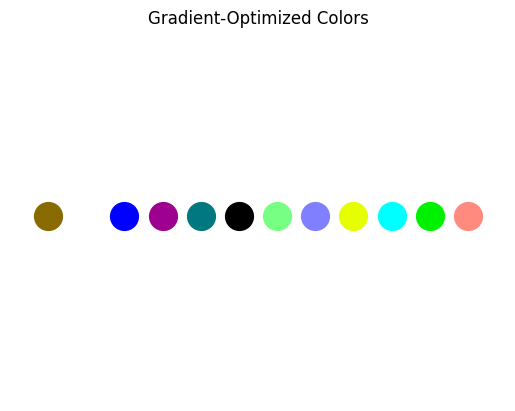

--- Evaluation for GD Optimized Colors (3D) ---
Number of points: 12
Minimum distance: 0.6657
Mean distance: 0.9825
Median distance: 1.0000
Max distance: 1.7321



(np.float32(0.6656762),
 array([0.6656762 , 0.67389154, 0.674889  , 0.678652  , 0.680019  ,
        0.6802268 , 0.6806828 , 0.68378186, 0.687803  , 0.68974066,
        0.6914507 , 0.6941157 , 0.6942744 , 0.6981085 , 0.70000094,
        0.700851  , 0.7052523 , 0.70571154, 0.707531  , 0.70777065,
        0.70803505, 0.7142132 , 0.71960133, 0.7235449 , 0.73927486,
        0.7543778 , 0.76112264, 0.7801264 , 0.782867  , 0.8379063 ,
        0.90549505, 0.9481672 , 1.        , 1.        , 1.        ,
        1.0013424 , 1.0026342 , 1.0042083 , 1.0045965 , 1.0128214 ,
        1.1555241 , 1.1624535 , 1.1809605 , 1.1850213 , 1.1869748 ,
        1.2051008 , 1.205873  , 1.209308  , 1.2096814 , 1.2184699 ,
        1.2288615 , 1.2343084 , 1.2415656 , 1.2451572 , 1.246094  ,
        1.256705  , 1.2653489 , 1.2754215 , 1.3480484 , 1.3480484 ,
        1.3780497 , 1.4142135 , 1.4142135 , 1.4151632 , 1.6784619 ,
        1.7320508 ], dtype=float32))

In [9]:
# Optimize points in 3D for RGB colors
n_colors = 12
optimized_points_3d = optimize_points_3d(n_colors, alpha=40.0, lr=0.01, n_iters=1500, num_runs=2)

# Convert to RGB colors
optimized_colors = convert_points_to_rgb(optimized_points_3d)

# Visualize the colors using our utility function
from coloropt.visualization import plot_color_list
plot_color_list(optimized_colors, title="Gradient-Optimized Colors")
plt.show()

# Evaluate the distribution
evaluate_point_distribution(optimized_points_3d, title="GD Optimized Colors (3D)")